In [23]:
# imports
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import sys

from q_dms_ttr_paper.paths import DATA_PATH
from q_dms_ttr_paper.titration import fit_bootstrap, normalized_hill_equation


# general figure tweaks
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["font.size"] = 16
# to fight the theme
plt.rcParams["figure.facecolor"] = "white"

In [24]:
def normalize_data(data):
    if np.min(data) == np.max(data):
        return data
    return (data) / (np.max(data))

def compute_mg_1_2(mg_conc, data):
    pstart = [1, 1, 1]
    norm_data = -normalize_data(np.array(data)) + 1
    pfit, perr = fit_bootstrap(pstart, mg_conc, norm_data, normalized_hill_equation)
    return pfit, perr


def generate_titration_plot(g, color='blue'):
    r = compute_mg_1_2(list(g["mg_conc"]), list(g["gaaa_avg"]))
    name = g["name"].iloc[0]
    #print(g[["mg_conc", "gaaa_avg"]])
    norm_data = -normalize_data(np.array(g['gaaa_avg'])) + 1
    #plt.title(f"{name} - {g.iloc[0]['dg']} - mg1/2 - {round(r[0][0], 3)}, +/- {round(r[1][0], 3)}")
    plt.scatter(g["mg_conc"], norm_data, color=color)
    xs, ys = [], []
    for j in np.arange(0, 50, 0.25):
        p = r[0]
        y = normalized_hill_equation(j, p[0], p[1], p[2])
        xs.append(j)
        ys.append(y)
    plt.plot(xs, ys, color=color)
    plt.fill_between(xs, ys-r[1][0], ys+r[1][0], alpha=0.2, lw=0)
    plt.ylim(-0.05, 1.1)

In [25]:
df = pd.read_json(f"{DATA_PATH}/processed/mttr6_data_full.json")
df_wt = pd.read_json(f"{DATA_PATH}/processed/wt_mg_titra.json")
df = df[df["mg_conc"] != 5.0]


In [26]:
df_sub = df[df["run_name"] == "2022_08_26_mtt6_set1-3_MgTitra_KU_seq"]

In [27]:
print(df_sub["rna_name"].unique())

['mtt6_mutations_set_1_50mM_NaC_40_mM_Mg2+'
 'mtt6_mutations_set_1_50mM_NaC_20_mM_Mg2+'
 'mtt6_mutations_set_1_50mM_NaC_15_mM_Mg2+'
 'mtt6_mutations_set_1_50mM_NaC_10_mM_Mg2+'
 'mtt6_mutations_set_1_50mM_NaC_7.5_mM_Mg2+'
 'mtt6_mutations_set_1_50mM_NaC_6.5_mM_Mg2+'
 'mtt6_mutations_set_1_50mM_NaC_3.5_mM_Mg2+'
 'mtt6_mutations_set_1_50mM_NaC_2.5_mM_Mg2+'
 'mtt6_mutations_set_1_50mM_NaC_1.5_mM_Mg2+'
 'mtt6_mutations_set_1_50mM_NaC_1_mM_Mg2+'
 'mtt6_mutations_set_1_50mM_NaC_0.75_mM_Mg2+'
 'mtt6_mutations_set_1_50mM_NaC_0.5_mM_Mg2+'
 'mtt6_mutations_set_1_50mM_NaC_0.25_mM_Mg2+'
 'mtt6_mutations_set_1_50mM_NaC_0.1_mM_Mg2+'
 'mtt6_mutations_set_1_50mM_NaC_0_mM_Mg2+'
 'mtt6_mutations_set_2_50mM_NaC_40_mM_Mg2+'
 'mtt6_mutations_set_2_50mM_NaC_20_mM_Mg2+'
 'mtt6_mutations_set_2_50mM_NaC_15_mM_Mg2+'
 'mtt6_mutations_set_2_50mM_NaC_10_mM_Mg2+'
 'mtt6_mutations_set_2_50mM_NaC_7.5_mM_Mg2+'
 'mtt6_mutations_set_2_50mM_NaC_6.5_mM_Mg2+'
 'mtt6_mutations_set_2_50mM_NaC_3.5_mM_Mg2+'
 'mtt6_mutations_set

In [28]:
df_sub["name"].unique()

array(['CAAGG_CCUAAC', 'CAUGC_GCUAAA', 'CAUGU_ACUAAA', 'CACGG_CCUACA',
       'CACGG_CCUAAA', 'CAUGG_CCUAAC', 'CACGG_CCUAAC', 'CAUGC_GCUACA',
       'CAGGG_CCUACC', 'CAGGG_CCUAAA', 'CACGC_GCUAAA', 'CAAGG_CCUAAA',
       'CACGG_CCUACC', 'CAUGA_UCUAAA', 'AACGG_CCUGCC', 'GACGG_CCUAAG',
       'UACGG_CCUACG', 'CAUGG_CCUAAA', 'UAUGG_CCUAAC', 'UAUGG_CCUAAAG',
       'UACGG_CCUAAC', 'UACGG_CCUAAG', 'CAUGG_CCUACC', 'CAUGG_CCUACA',
       'CAGGG_CCUAAC', 'AAGGG_CCUGCC', 'UAGGG_CCUACC', 'UACGA_UCUAAG',
       'CAGGC_GCUAAA', 'UAUGG_UCUAAC', 'UACGC_GCUACG', 'UACGA_UCUACG',
       'CAUGG_CCUUCC', 'CACGG_CCUUCC', 'CAGGG_CCUACA', 'AACGG_CCUAAC',
       'CAAGG_CCUACC', 'AAUGG_CCUAAA', 'AAUGG_CCUUCC', 'UACGC_GCUAAG',
       'UACGG_CCUACC', 'GAUGG_CCUAAAG', 'UACGG_CCUACA', 'AAUGG_CCUAAC',
       'GAUGG_CCUAAA', 'CAUGU_ACUAAC', 'UACGG_CCUAAA', 'CAAGC_GCUAAA',
       'UAUGG_CCUACC', 'CAUGG_CCUUAA', 'CAUGG_CCUACU', 'CAUGG_CCCUAAC',
       'CACGG_CCUAAG', 'AACGG_CCUAAA', 'UAAGG_CCUAAC', 'AAUGG_CCUACC',
   

[0.22930451 1.43356594 0.93754009]


/opt/homebrew/Caskroom/miniconda/base/envs/py3/lib/python3.8/site-packages/q_dms_ttr_paper/titration.py:18: RuntimeWarning: invalid value encountered in power
  return A * ((conc / K) ** n) / (1 + (conc / K) ** n)


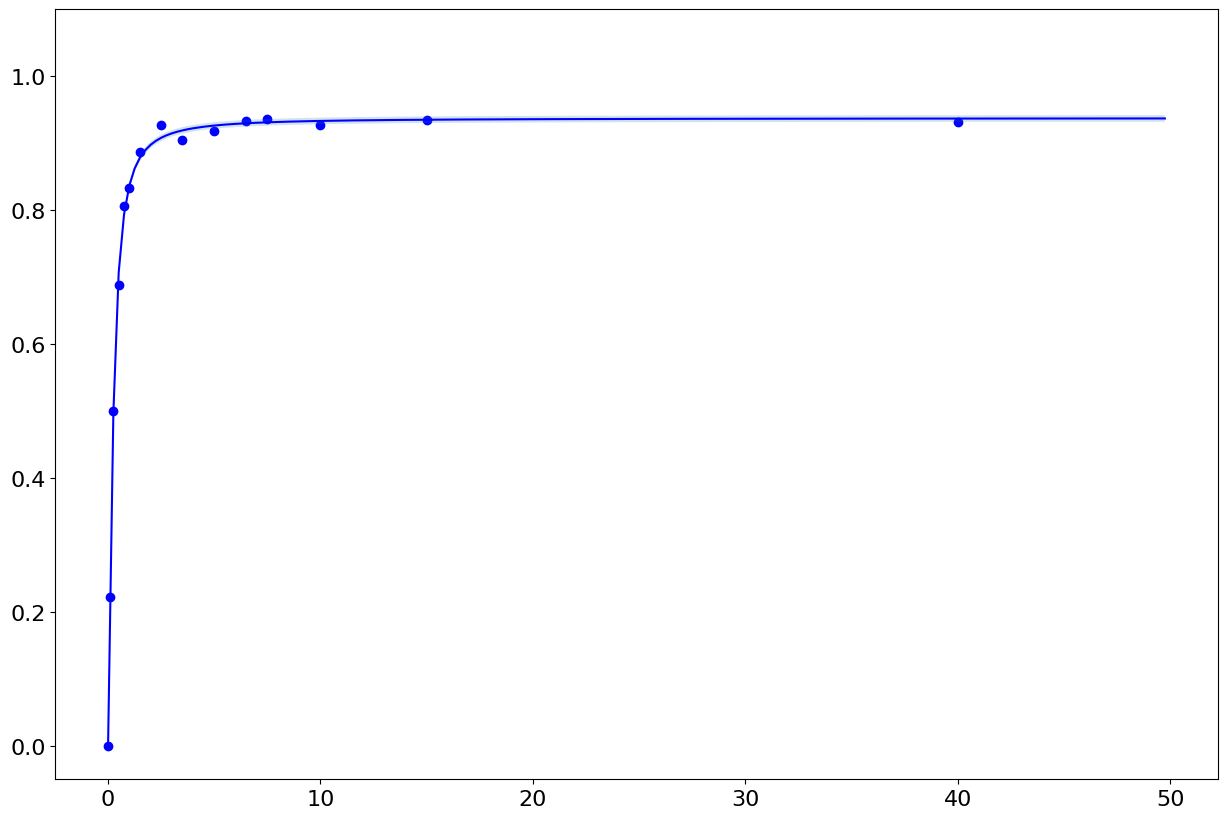

In [29]:
for (name, exp_name), g in df_wt.groupby(["name", "exp_name"]):
    pfit, perr = compute_mg_1_2(g["mg_conc"], g["gaaa_avg"])
    print(pfit)
    #plt.plot(g["mg_conc"], -normalize_data(g["gaaa_avg"]) + 1)
    generate_titration_plot(g)
    break

## CAUGG_CCUAAA

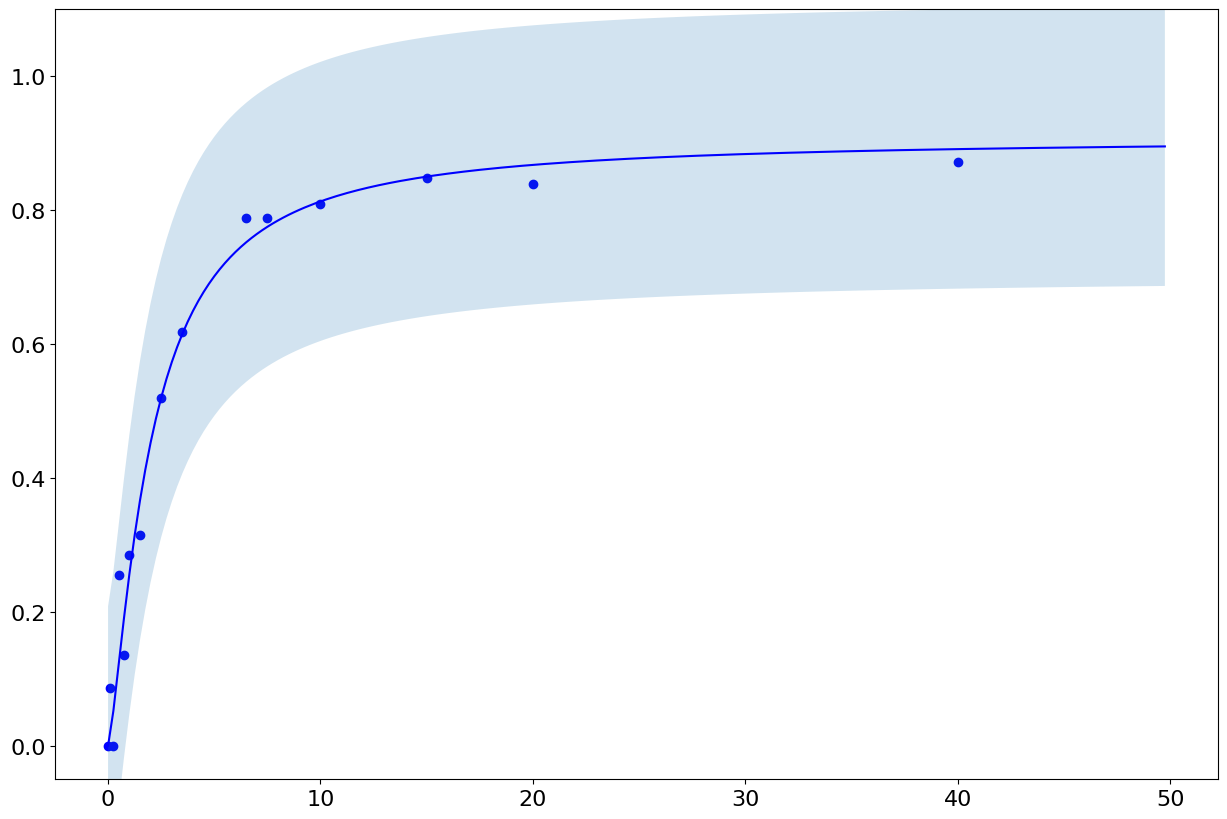

In [30]:
generate_titration_plot(df[df["name"] == "AAUGG_CCUAAA"])

### compare different fitting procedure

In [31]:
df_org = pd.read_csv("/Users/jyesselman2/Dropbox/notes/projects/q_dms_mapseq/analysis/notebooks/mg_1_2.csv")
df_new =  pd.read_csv(f"{DATA_PATH}/processed/mtt6_data_mg_1_2_no_scale.csv")
df_compare = pd.merge(df_org, df_new, on="name", suffixes=("_old", "_new"))
df_compare = df_compare[df_compare["k"] < 100]
df_compare = df_compare[df_compare["mg_1_2"] < 100]


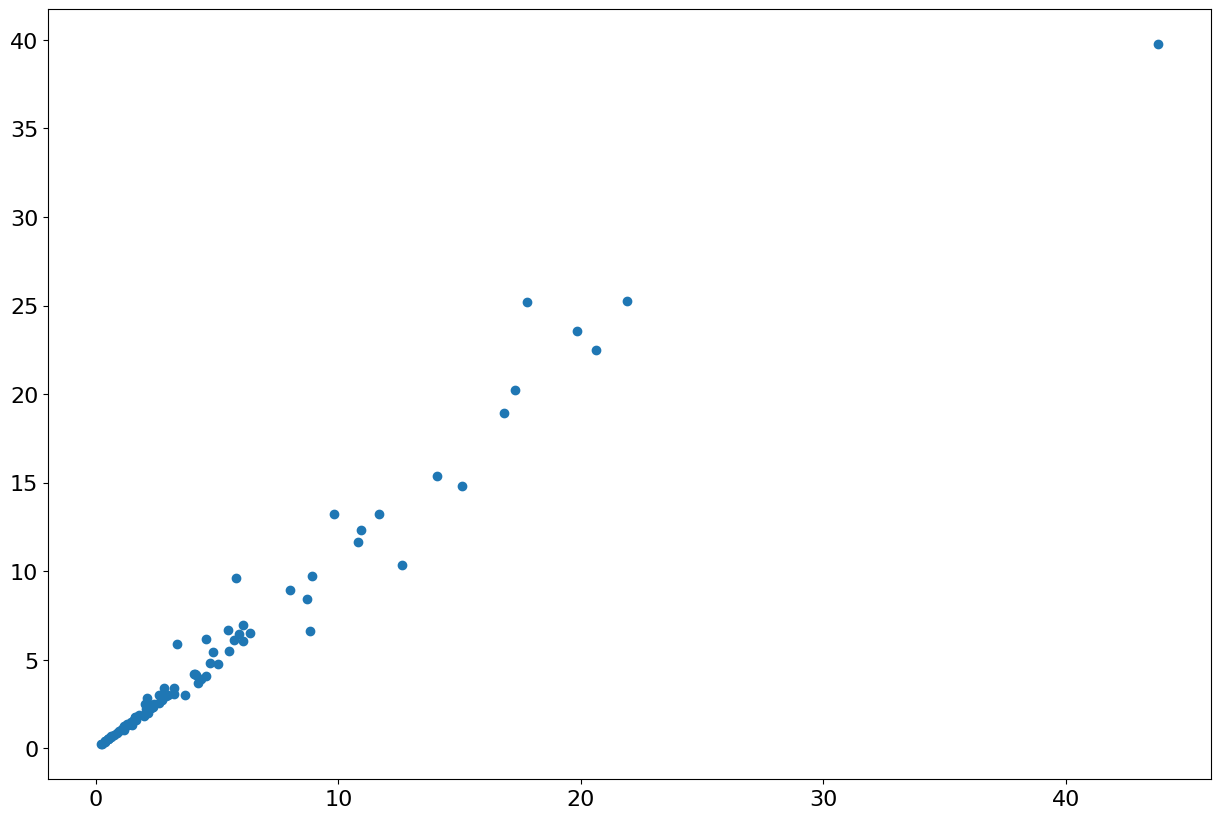

In [32]:
plt.scatter(df_compare["k"], df_compare["mg_1_2"])

In [22]:
print(stats.pearsonr(df_compare["k"], df_compare["mg_1_2"])[0] ** 2)

0.9644820411371983


In [35]:
df_compare.describe()

,Unnamed: 0,k,n_old,mg_1_2,mg_1_2_err,n_new,n_err
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,48.258065,4.992430,0.890802,5.393062,0.713059,0.939043,0.092403
std,28.719749,6.446897,0.185401,6.834025,1.389658,0.182360,0.049460
min,0.000000,0.202732,0.392779,0.232928,0.016672,0.383252,0.051018
25%,23.000000,1.445154,0.788564,1.403146,0.099344,0.831044,0.067783
50%,50.000000,2.581499,0.879046,2.718586,0.202266,0.930311,0.076974
75%,73.000000,5.685149,0.982614,6.158596,0.607982,1.067062,0.091301
max,97.000000,43.795127,1.507622,39.750283,9.910831,1.477208,0.329983


## section 2
